**Logistic Regression:**

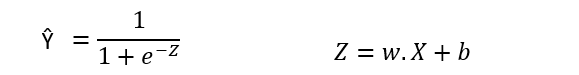

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


Derivatives :

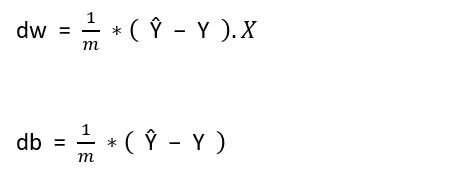

In [1]:
import numpy as np


In [3]:
class Logistic_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m , self.n = X.shape
    self.X = X
    self.Y = Y
    self.w = np.zeros(self.n)
    self.b = 0

    #Implementing gradient descent 
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
   # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db

  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))     
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred


  

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# separating the data and labels
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

Data Standardization

In [9]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [10]:
standardized_data = scaler.transform(features)

In [11]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [12]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [13]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [15]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model 

In [16]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=10000)

In [17]:
classifier.fit(X_train, Y_train)

Model evaluation : Accuracy score

In [18]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [19]:
print('Accuracy on training set : ', training_data_accuracy)

Accuracy on training set :  0.7801302931596091


In [20]:
# accuracy score on the training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)
print('Accuracy on test set : ', test_data_accuracy)

Accuracy on test set :  0.7662337662337663


Making a predictive system

In [23]:
input_data = (4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


CAN SAVE LOGISTIC REG CLASS AS A .PY FILE
Say, Log_Reg

ADD IMPORT NUMPY.NP THERE

THEN -

classifier = Log_Reg.Logistic_Regression(learning_rate......)

Others - same